In [1]:
#Importing pandas and numpy libraries
import numpy as np
import pandas as pd

In [2]:
#Importing the train and test data
train = pd.read_csv("../Train.csv")
test = pd.read_csv("../Test.csv")

In [3]:
#Checking the head of train dataframe
train.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [4]:
#Checking the head of test dataframe
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#Checkinig the info of all the variables in train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Train dataframe has two variables with missing values: <br>
- Item_Weight     1463 <br>
- Outlet_Size     2410

In [6]:
#Checkinig the info of all the variables in test dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Test dataframe has two variables with missing values: <br>
- Item_Weight    976 <br>
- Outlet_size    1606

In [7]:
#Checking the column names, to check if they have any spaces in between the characters
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
#Checking the column names, to check if they have any spaces in between the characters
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
# Analyzing numerical variables
numeric_variables = (train.dtypes.loc[train.dtypes != 'object']).index 
train[numeric_variables].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#Analysing categorical variables
# Getting indices(column names) of all the columns having datatype as 'object'
categorical_variables = train.dtypes.loc[train.dtypes == 'object'].index
categorical_variables

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<h3>Some visualizations Univariate Analysis</h3>

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,6]
import warnings
warnings.filterwarnings("ignore")

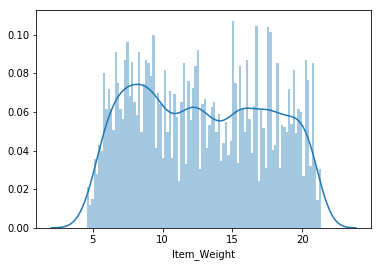

In [19]:
sns.distplot(train['Item_Weight'].dropna(), bins=100)

There is no clear pattern in Item_Weight variable.

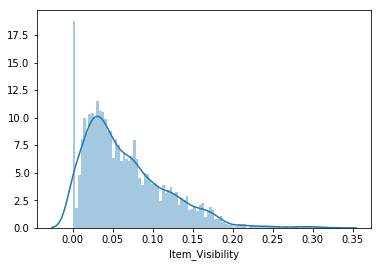

In [20]:
sns.distplot(train['Item_Visibility'], bins=100)

Item_Visibility variable has positively skewed distribution and also having entires with 0 values, which is strange as Item-Visibility cannot be zero. If item is not visible how the customer will buy it. :))

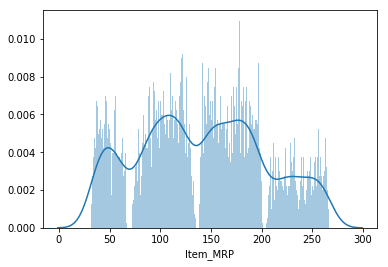

In [21]:
sns.distplot(train['Item_MRP'], bins=500)

Item_MRP variable shows 4 kinds of distribution.

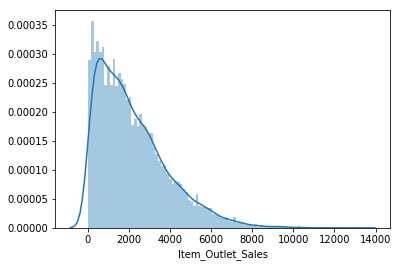

In [22]:
sns.distplot(train['Item_Outlet_Sales'], bins=100)

Target variable Item_Outlet_Sales has positively skewed distribution.

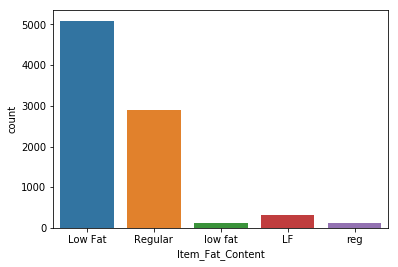

In [23]:
sns.countplot(train['Item_Fat_Content'])

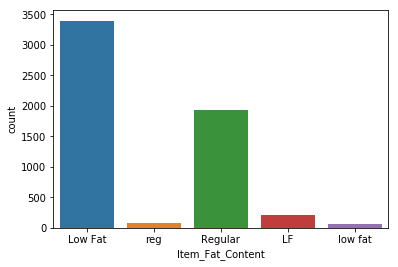

In [24]:
sns.countplot(test['Item_Fat_Content'])

It seems that there are only 2 categories for Item_Fat_Content. 'low fat' and 'LF' comes under 'Low Fat' while 'reg' comes under 'Regular'. 

In [25]:
# Item_Fat_Content variable transformation (Train and Test)
def fat_categories(x):
    y = x
    if y == 'low fat' or y == 'LF':
        return 'Low Fat'
    elif y == 'reg':
        return 'Regular'
    else:
        return y

train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(fat_categories)
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(fat_categories)

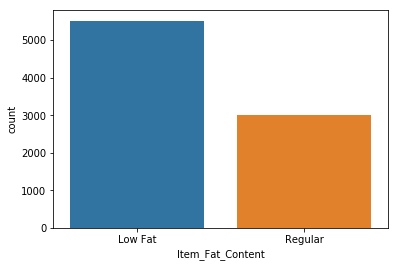

In [26]:
sns.countplot(train['Item_Fat_Content'])

<h3> Multivariate Analysis </h3>

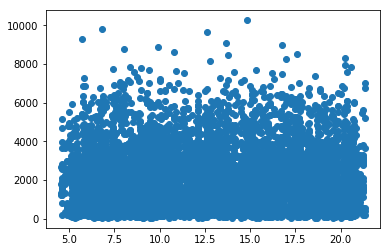

In [27]:
# Item_Weight v/s Item_Outlet_Sales
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])

There is no pattern between Item_Weight and Item_Outlet_Sales as they are spread well across the entire area.

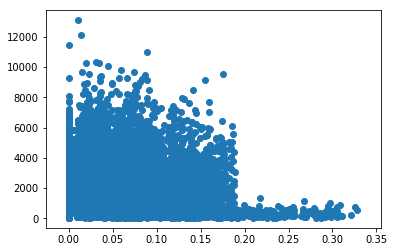

In [28]:
# Item_Visibility v/s Item_Outlet_Sales
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'])

We can see that there is a straight vertical line at 0 Item_Visibility, which is kinda strange.

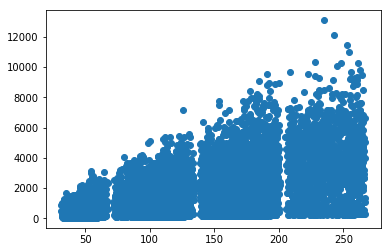

In [29]:
# Item_MRP vs Item_Outlet_Sales
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])

We can see that Item_MRP is divided into 4 block and showing gradual increase. We can use them in feature engineering to crear new variable.

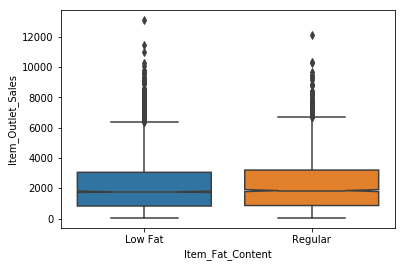

In [30]:
# Item_Fat_Content v/s Item_Outlet_Sales
sns.boxplot(train['Item_Fat_Content'], train['Item_Outlet_Sales'], notch=True)

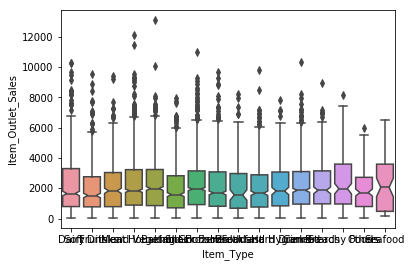

In [31]:
# Item_Type v/s Item_Outlet_Sales
sns.boxplot(train['Item_Type'], train['Item_Outlet_Sales'], notch=True)

Distribution of Item_Outlet_Sales is not very different for categories in Item_Fat_Content and Item_Type.

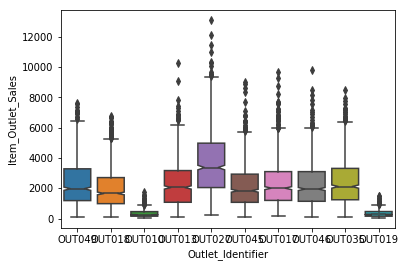

In [32]:
# Outlet_Identifier v/s Item_Outlet_Sales
sns.boxplot(train['Outlet_Identifier'], train['Item_Outlet_Sales'], notch=True)

Distribution of Item_Outlet_Sales for Outlet Identifier OUT010 & OUT019 is almost same and is different from other Outlet Identifiers.

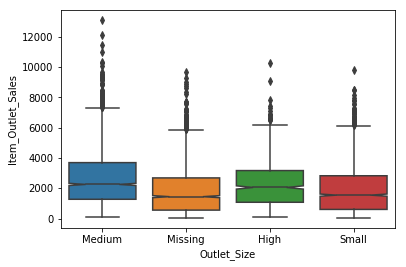

In [33]:
# Outlet_Size vs Item_Outlet_Sales

outlet = train['Outlet_Size'].apply(lambda x : 'Missing' if pd.isnull(x) else x)
sns.boxplot(outlet, train['Item_Outlet_Sales'], notch=True)

We can see that missing values in Outlet_Size is similar to 'Small' category in Outlet_Size. So we can replace 'Missing' with 'Small'.

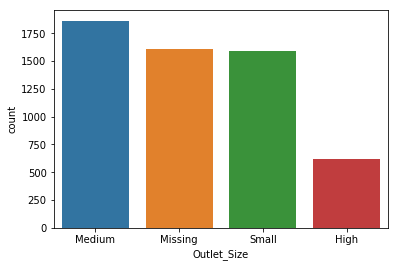

In [34]:
# Outlet_Size vs Item_Outlet_Sales

outlet = test['Outlet_Size'].apply(lambda x : 'Missing' if pd.isnull(x) else x)
sns.countplot(outlet)

In [35]:
# Missing value treatment for Outlet_Size. Substituting missing values with 'Small'
train['Outlet_Size'] = train['Outlet_Size'].apply(lambda x : 'Small' if pd.isnull(x) else x)
test['Outlet_Size'] = test['Outlet_Size'].apply(lambda x : 'Small' if pd.isnull(x) else x)

Missing values : 0


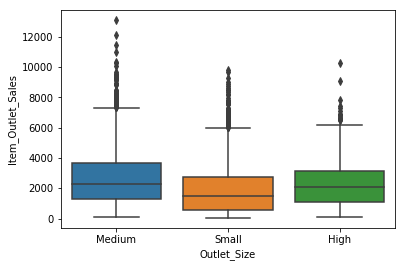

In [36]:
print('Missing values : {}'.format(train['Outlet_Size'].isna().sum()))
sns.boxplot(train['Outlet_Size'], train['Item_Outlet_Sales'])

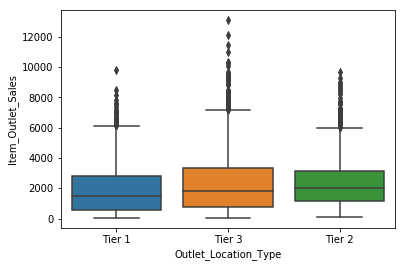

In [37]:
# Outlet_Location_Type v/s Item_Outlet_Sales
sns.boxplot(train['Outlet_Location_Type'], train['Item_Outlet_Sales'])

Distribution of Tier1 and Tier2 location looks similar.

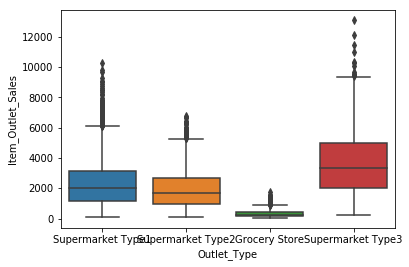

In [38]:
# Outlet_Type v/s Item_Outlet_Size
sns.boxplot(train['Outlet_Type'], train['Item_Outlet_Sales'])

Grocery store distribution is different from others. It is more concentrated around lower values of Item_Outlet_Sales.

In [192]:
# Merging train and test dataframes to impute missing values and feature engineering.
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [194]:
# Filling missing values in Item_Weight by the mean of Item_identifier wise Item_Weight 
# matching the corresponding Item_Weight with NaN 

missing = data['Item_Weight'].isnull()
item_avg_weight = data.groupby('Item_Identifier')[['Item_Weight']].mean()
data.loc[missing,'Item_Weight'] = data.loc[missing,'Item_Identifier'].apply(lambda x : item_avg_weight.loc[x][0])


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [196]:
# Filling 0 value in Item_visibility by the mean of Item_identifier wise Item_Visibility

zero_val = data['Item_Visibility'] == 0
item_visibility_avg = data.groupby('Item_Identifier')[['Item_Visibility']].mean()
data.loc[zero_val,'Item_Visibility'] = data.loc[zero_val,'Item_Identifier'].apply(lambda x : item_visibility_avg.loc[x][0])


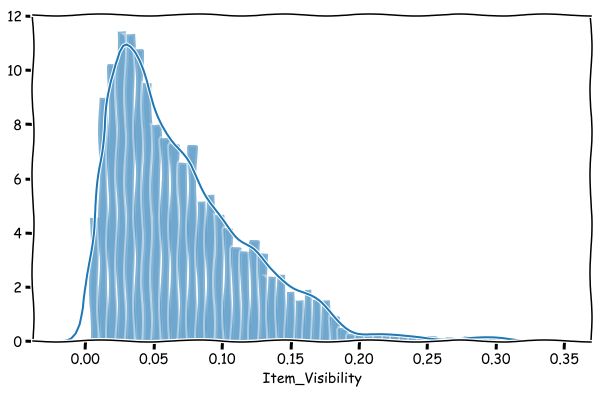

In [197]:
sns.distplot(data['Item_Visibility'])

We can see that there is no 0 value in item visibility now. :))

In [198]:
x = []
for i in train['Item_Identifier'].values:
    first_two = i[:2]
    x.append(first_two)
print(pd.Series(np.array(x)).unique())
print('\nInteresting !! First two letters of data in Item_Identifier tell us that there are 3 categories present. ')
print('From the abbrevation we can say that FD means Food || DR means Drinks || NC means Non-Consumable ')

['FD' 'DR' 'NC']

Interesting !! First two letters of data in Item_Identifier tell us that there are 3 categories present. 
From the abbrevation we can say that FD means Food || DR means Drinks || NC means Non-Consumable 


<h3> We dealt with the missing values and item visibility problem. <br> Now we will start doing Feature Engineering.</h3>
<h6> <b> We will create/transform following variables: </b> <br>  </h6>
    - <b>Item_Type</b> (We will create 3 categories Perishable, Non_Perishable, Unknown) <br>
    - <b>Item_Identifier</b> (We will create 3 categories namely Food(FD), Drink(DR) and Non-Consumable(NC)) <br>
    - <b>Outlet_Establishment_Year</b> (We will transform it, so that it contains number of operational years by subtracting it from current year) <br>
    - <b>Item_MRP and Item_Weight</b> (We will create new variable that contain Item MRP per unit weight) <br>
    - <b>Item_MRP</b> (We will transform this to make 4 clusters as we can see from scatter plot also.)

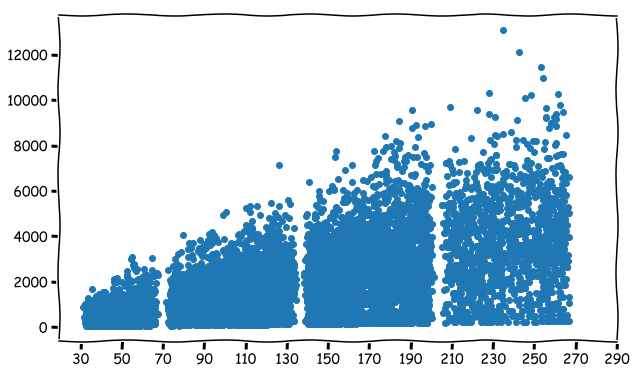

In [199]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.xticks(np.arange(30,300,20))
plt.show()

From above plot we can see that 4 clusters ranges are: <br>
    x < 69 |||  69 <= x < 136 |||  136 <= x < 203 |||  203 <= x < 280 

In [200]:
# Transforming Item_Type variable
perishable = ['Fruits and Vegetables','Meat','Dairy','Breakfast','Seafood','Breads']
non_perishable = ['Soft Drinks','Household','Baking Goods','Frozen Foods','Health and Hygiene','Hard Drinks',
                 'Canned']
unknown = ['Others','Snack Foods','Starchy Foods']

def item_type_transform(x):
    a = x
    if a in perishable:
        return 'Perishable'
    if a in non_perishable:
        return 'Non Perishable'
    if a in unknown:
        return 'Unknown'
    else:
        return a

data['Item_Type'] = data['Item_Type'].apply(item_type_transform)

In [201]:
data['Item_Type'].value_counts()

Non Perishable    7090
Perishable        4576
Unknown           2538
Name: Item_Type, dtype: int64

In [202]:
# Transforming Item_Identifier
def item_identifier_transform(x):
    a = x
    if x[:2] == 'FD':
        return 'Food'
    elif x[:2] == 'DR':
        return 'Drink'
    else:
        return 'Non-Consumable'
    
data['Item_Identifier'] = data['Item_Identifier'].apply(item_identifier_transform)

In [203]:
data['Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Identifier, dtype: int64

In [204]:
# We will add another category in Item_Fat_Content i.e. No Fat. This is for Non-Consumable items
def item_fat_content_transform(x):
    a,b = x[0], x[1]
    if a == 'Non-Consumable':
        return 'No Fat'
    else:
        return b
    
data['Item_Fat_Content'] = data[['Item_Identifier','Item_Fat_Content']].apply(item_fat_content_transform, axis=1)

In [205]:
data['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
No Fat     2686
Name: Item_Fat_Content, dtype: int64

In [206]:
# Renaming Outlet_Establishment_Year to Operational_Years and subtracting values from current year.
data['Operational_Years'] = data['Outlet_Establishment_Year'].apply(lambda x : 2019 - x)

In [207]:
data['Operational_Years'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Operational_Years, dtype: float64

In [208]:
# Adding new column Price_Per_Unit_Weight
data['Price_Per_Unit_Weight'] = data['Item_MRP']/data['Item_Weight']

In [209]:
# Transforming Item_MRP to add 4 categories in it
def item_mrp_transform(x):
    a = x
    if a < 69:
        return '1st'
    elif a >= 69 and a < 136:
        return '2nd'
    elif a >= 136 and a < 203:
        return '3rd'
    elif a >= 203:
        return '4th'
    else:
        return a
    
data['Item_MRP'] = data['Item_MRP'].apply(item_mrp_transform)

In [210]:
data['Item_MRP'].value_counts()

3rd    4935
2nd    4661
4th    2400
1st    2208
Name: Item_MRP, dtype: int64

In [211]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Operational_Years,Price_Per_Unit_Weight
0,Low Fat,Food,4th,3735.1380,Perishable,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,20,26.861204
1,Regular,Drink,1st,443.4228,Non Perishable,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,10,8.153581
2,Low Fat,Food,3rd,2097.2700,Perishable,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,20,8.092457
3,Regular,Food,3rd,732.3800,Perishable,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,21,9.484115
4,No Fat,Non-Consumable,1st,994.7052,Non Perishable,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,32,6.031512


In [212]:
# Dropping Item_Weight Outlet_Establishment_Year
data.drop(labels=['Item_Weight', 'Outlet_Establishment_Year'], inplace=True, axis=1)

In [213]:
data.head(1)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Operational_Years,Price_Per_Unit_Weight
0,Low Fat,Food,4th,3735.138,Perishable,0.016047,OUT049,Tier 1,Medium,Supermarket Type1,train,20,26.861204


In [214]:
# Divide data back into test and train sets
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [217]:
test.drop(['Item_Outlet_Sales'], inplace=True, axis=1)

In [224]:
train.drop(['source'], axis=1).to_csv('../Transformed_Train.csv', index=False)
test.drop(['source'], axis=1).to_csv('../Transformed_Test.csv', index=False)